<a href="https://colab.research.google.com/github/satishgunjal/Deep-Learning-Using-Python-Tensorflow-Keras/blob/master/01_Keras_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network in Keras for image classification problem
* We will use keras fashion MNIST dataset. 
* This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories(labels) shown below
  * 0 T-shirt/top
  * 1 Trouser
  * 2 Pullover
  * 3 Dress
  * 4 Coat
  * 5 Sandal
  * 6 Shirt
  * 7 Sneaker
  * 8 Bag
  * 9 Ankle boot

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 
* The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.
* [Kaggle Reference](https://www.kaggle.com/zalando-research/fashionmnist)

## Problem Statement
* Build neural netwrok to predict the correct label from test data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import keras

In [69]:
keras.backend.backend()

'tensorflow'

## import the Fashion mnist from keras datasets
*  x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).

*  y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

*  (The Uint8Array typed array represents an array of 8-bit unsigned integers. 8-bit unsigned integer has a range of 0 to 255)

*  Since its 8bit gray scale image every pixel is stored in 1byte of memmory. Min value of each pixel in image data array is 0 means black, where max value is 255(2^8-1) means white
*  For more details about Bit-Map Images pls refer [Bit-Map Images](https://courses.cs.vt.edu/~cs1204/art/bitmaps.html) and [Quera post about 8-Bit image](https://qr.ae/pNrl0g)

In [0]:
from keras.datasets import fashion_mnist
(X_train,y_train) ,(X_test,y_test) = fashion_mnist.load_data()


In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


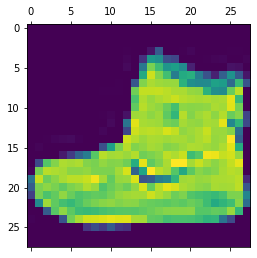

In [72]:
# First element from tarining set
plt.matshow(X_train[0])

In [73]:
#Label of the first training set
y_train[0]

9

As per data label 9 is for Ankle boot

## Normalize training data before training the neural net
* We will use feature scaling for data normalization. Feature scaling involves dividing input value by range(max -min).
* After feature scaling we get feature range from 0 to 1

In [0]:
X_train = X_train/255

In [0]:
X_test =X_test/255

## Now build the Sequential Model and add layers into it
* Sequential model is linear stack of layers
* Here we are going to use Flatten, Dense and Activation layer
* We are going to use Flatten to convert our input image 2D array(28x28) to 1D array(784)
* We are using Dense layer  with activation function 'relu' to create our hidden layer. To start with we will use 100 neurons.
* And we will use Dense layer with activation function 'softmax' to create our output layer. Since we have 10 categories(labels) we are going use 10 neurons in this layer
* 'softmax' activation function in last layer is used to ditribute the set of numbers into the probabilty for the output classess(labels)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model= Sequential()

model.add(Flatten(input_shape = [28,28]))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Compiling the model
* Before training the model we must compile the model
* In model compile step we configure the learning process of the model
* Arguments of the compile method
  * **An optimizer**. An optimizer is nothing but an algorithm that helps to adjust the weights of the edges. 
 This could be the string identifier of an existing optimizer (such as rmsprop or Adam), or an instance of the Optimizer class. 
  * **A loss function**. It’s a method of evaluating how well your algorithm models your dataset. If your predictions are totally off, your loss function will output a higher number. If they’re pretty good, it’ll output a lower number. 
  
    This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or sparse_categorical_crossentropy), or it can be an objective function.
  * **A list of metrics**. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training the model

In [79]:
model.fit(X_train,y_train)

Epoch 1/1
60000/60000 [==============================] - 4s 67us/step - loss: 0.5089 - accuracy: 0.8233


In [80]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 26us/step


[0.44532530145645144, 0.8406999707221985]

Model accuracy is 84% and first parameter is loss. We can play with the parameters to improve the accuracy. e.g. try increasing the numbe of hidden layer

## Prediction
* Lets predict the value of test example at index 1 in test set (ans is 2 = Pullover)

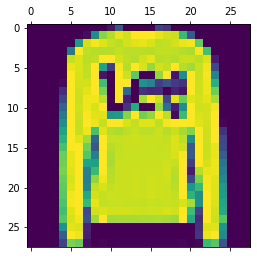

In [81]:
plt.matshow(X_test[1])

In [0]:
yp = model.predict(X_test)

In [84]:
# Note that 'softmax' activation function gives us the probability for each class in output layer.
# Class with maximum probability is our correct prediction (as per model)
np.argmax(yp[1])

2

In [0]:
#Lets create a list of labels

class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [86]:
class_labels[np.argmax(yp[1])]

'Pullover'